<a href="https://colab.research.google.com/github/Vaishnavi23-sh/INTRODUCTION-TO-AI-ML/blob/main/EDA_Cars_G_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Data Set

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Scaling**
- **Encoding Categorical variables**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel('EDA Cars-1 (1).xlsx')

In [7]:
df.head(10)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1.0,Texas,42420.0
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
8,9,NaN,NaN,F,NaN,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,NaN,Texas,42420.0


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [8]:
df.tail()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
298,285,15251.52473,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,44412.0
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN
300,287,NaN,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,NaN,Las Vegas,44412.0
301,288,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0
302,289,0.00000,No,M,Bachelors,Student,11.657483,Commercial,19940.0,SUV,7.0,Las Vegas,44412.0


In [ ]:
df.shape

(303, 13)

**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [ ]:
df["POSTAL CODE"]= pd.Categorical(df['POSTAL CODE']) # Converting Postal Code into Category

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INDEX           303 non-null    int64   
 1   INCOME          260 non-null    float64 
 2   MARITAL STATUS  275 non-null    object  
 3   SEX             297 non-null    object  
 4   EDUCATION       259 non-null    object  
 5   JOB             257 non-null    object  
 6   TRAVEL TIME     262 non-null    float64 
 7   USE             250 non-null    object  
 8   MILES CLOCKED   278 non-null    float64 
 9   CAR TYPE        293 non-null    object  
 10  CAR AGE         283 non-null    float64 
 11  CITY            297 non-null    object  
 12  POSTAL CODE     300 non-null    category
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 29.2+ KB


In [ ]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [ ]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,303.000000,260.000000,262.000000,278.000000,283.000000
mean,139.640264,50025.162170,34.282098,13591.978417,6.265018
std,85.178422,41186.807914,14.910178,7167.328655,5.111218
min,1.000000,0.000000,5.000000,1500.000000,1.000000
25%,62.500000,20452.885023,24.449874,7900.000000,1.000000
50%,138.000000,44571.590870,33.564757,12065.000000,6.000000
75%,213.500000,66485.761387,43.907339,18240.000000,10.000000
max,289.000000,204667.589700,83.617643,38000.000000,20.000000


**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 14


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


**Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.**

In [ ]:
df.drop_duplicates(inplace=True)

**Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.**

In [ ]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


**Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289**

In [9]:
df.shape

(303, 13)

In [10]:
df.drop('INDEX', axis=1, inplace=True)

# Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

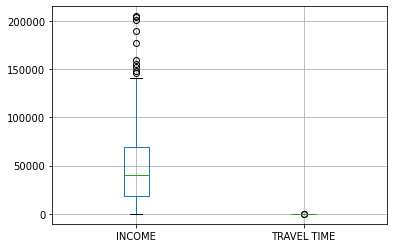

In [ ]:
df.boxplot(column=['INCOME', 'TRAVEL TIME'])
plt.show()


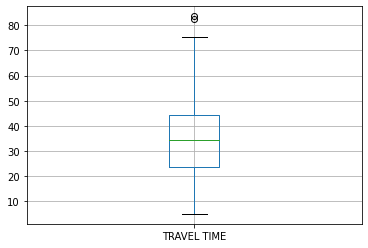

In [ ]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

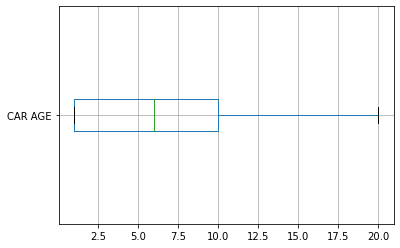

In [ ]:
df.boxplot(column=['CAR AGE'])
plt.show()

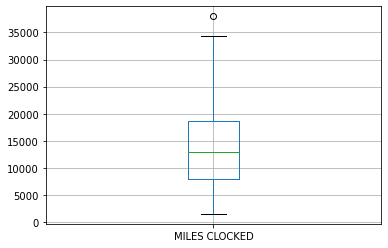

In [ ]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

**Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.**

**These outliers value needs to be teated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**



**Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])
df['INCOME']=np.where(df['INCOME']<lrincome,lrincome,df['INCOME'])


lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']<lrtravel,lrtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']<lrmiles,lrmiles,df['MILES CLOCKED'])

df.shape

(289, 12)

##  Make Boxplots after Outlier Treatment

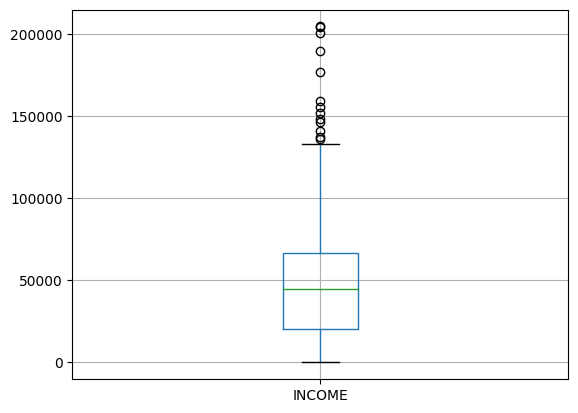

In [11]:
df.boxplot(column=['INCOME'])
plt.show()

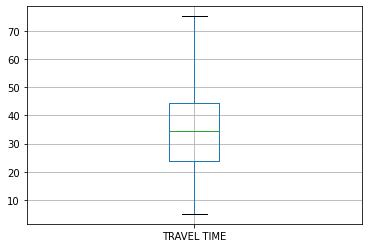

In [ ]:
df.boxplot(column=['TRAVEL TIME'])
plt.show()

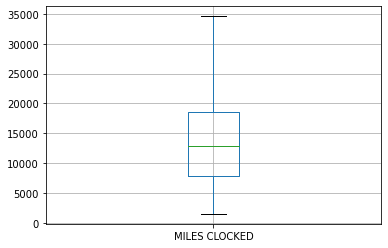

In [ ]:
df.boxplot(column=['MILES CLOCKED'])
plt.show()

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

# Check for missing value

In [ ]:
df.isnull().sum()

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

**Replacing NULL values in Numerical Columns using Median**

In [ ]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()

In [ ]:
df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)

**Replacing NULL values in Categorical Columns using Mode**

In [ ]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]
mode8=df["POSTAL CODE"].mode().values[0]

df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df['CITY']=df['CITY'].replace(np.nan,mode6)
df['POSTAL CODE']=df['POSTAL CODE'].replace(np.nan,mode8)

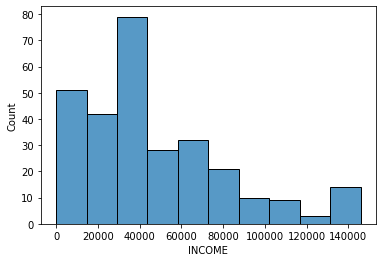

In [ ]:
sns.histplot(df.INCOME,bins=10);

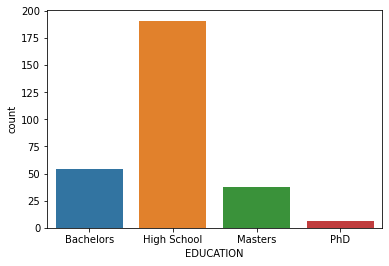

In [ ]:
sns.countplot(x=df["EDUCATION"]);

In [ ]:
df.corr()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
INCOME,1.000000,0.059463,0.341234,0.264218
TRAVEL TIME,0.059463,1.000000,0.023640,0.145489
MILES CLOCKED,0.341234,0.023640,1.000000,0.129989
CAR AGE,0.264218,0.145489,0.129989,1.000000


## Correlation Heatmap

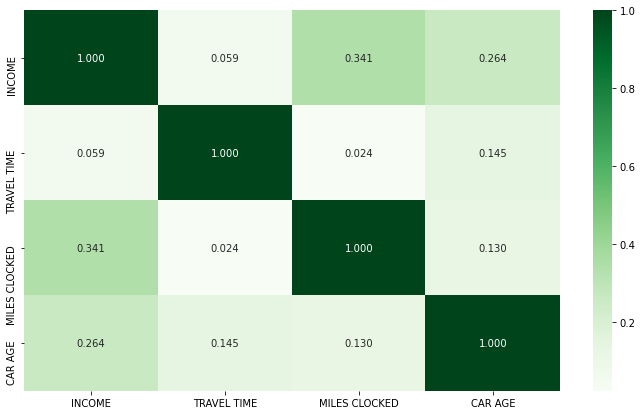

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [ ]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])
df['MILES CLOCKED']= std_scale.fit_transform(df[['MILES CLOCKED']])

In [ ]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,2.186892,No,F,Bachelors,Blue Collar,0.813273,Commercial,0.529946,Sports Car,0.137267,Texas,42420.0
1,0.108850,No,M,High School,Blue Collar,-0.981463,Private,0.748411,Minivan,-1.052842,Texas,42420.0
2,0.448162,No,F,Bachelors,Clerical,-0.048886,Private,-0.137830,SUV,-1.052842,Texas,42420.0
3,0.842148,No,F,High School,Lawyer,-1.351394,Private,0.656656,Sports Car,0.930674,Texas,42420.0
4,2.340148,No,M,High School,Blue Collar,0.007325,Commercial,2.118917,Panel Truck,0.732322,Texas,42420.0


# ENCODING

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

In [15]:
dummies=pd.get_dummies(df[["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]], columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"], prefix=["married", "sex","Education","Job","Use","cartype","city"],drop_first=True).head()
dummies.head(10)

,married_Yes,sex_M,Education_High School,Education_Masters,Education_PhD,Job_Clerical,Job_Doctor,Job_Home Maker,Job_Lawyer,Job_Manager,...,city_Houston,city_Las Vegas,city_Los Angeles,city_New Albany,city_New York City,city_Philadelphia,city_San Francisco,city_Seattle,city_Texas,city_Washington
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [16]:
df.tail(80)

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
223,50251.76240,No,M,Masters,NaN,62.783577,Commercial,18050.0,Van,1.0,Columbia,44123.0
224,14705.35906,Yes,F,High School,Home Maker,NaN,Private,11020.0,SUV,5.0,Columbia,44123.0
225,81766.51691,No,M,High School,Blue Collar,30.468715,Commercial,15570.0,SUV,7.0,NaN,44123.0
226,71206.84229,No,M,Bachelors,Professional,18.704147,Commercial,NaN,Panel Truck,12.0,Columbia,44123.0
227,27823.22137,No,M,Masters,Home Maker,48.968974,Private,3950.0,SUV,NaN,Columbia,44123.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,15251.52473,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,44412.0
299,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN
300,NaN,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,NaN,Las Vegas,44412.0
301,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0


In [ ]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY"]
df = pd.concat([df, dummies], axis=1)
df.drop(columns, axis = 1, inplace=True)

In [13]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
